In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as nump # linear algebra
import pandas as pnd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud/card_transdata.csv


In [2]:
import numpy as nump
import pandas as pnd
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
# using pandas read_csv() function to read csv file
cd=pnd.read_csv('../input/credit-card-fraud/card_transdata.csv')
cd.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
# using shape() function of numpy to illustrate the number of rows and columns as (rows, columns)
cd.shape

(1000000, 8)

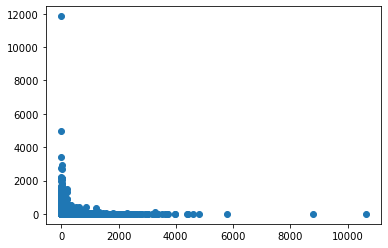

In [5]:
# using matplot library to draw scatterplot
plot.scatter(cd['distance_from_home'],cd['distance_from_last_transaction'])

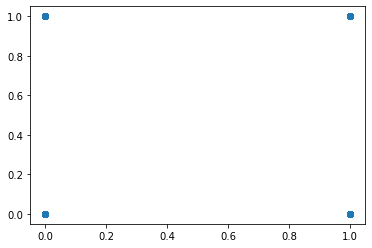

In [6]:
# using matplot library to draw scatterplot
plot.scatter(cd['used_chip'],cd['used_pin_number'])

<AxesSubplot:xlabel='fraud', ylabel='count'>

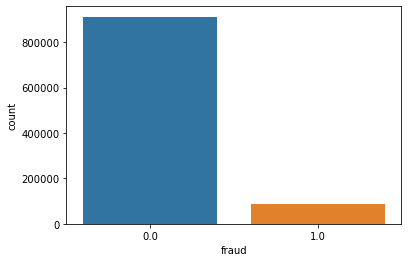

In [7]:
sns.countplot(cd['fraud'])

<AxesSubplot:xlabel='online_order', ylabel='count'>

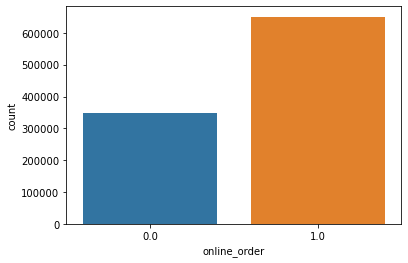

In [9]:
sns.countplot(cd['online_order'])

<AxesSubplot:xlabel='used_chip', ylabel='Density'>

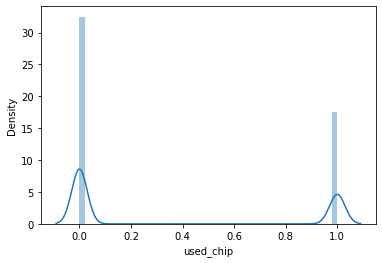

In [11]:
sns.distplot(cd['used_chip'])

In [13]:
# the iloc function is used to locate specific range of rows from the data. The index always starts from 0. And the range given is (inclusive, exclusive)
x=cd.iloc[:,:-1]
x.head()
y=cd.iloc[:,-1]

In [14]:
x.shape, y.shape

((1000000, 7), (1000000,))

In [15]:
#Sklearn function train_test_split splits the data into 75% training data and 25% test data
# random_state : It means one random_state value has a fixed dataset. It means every time we run code with random_state value 1, it will produce the same splitting datasets
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [16]:
# extracting the shape of each of these sets
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((700000, 7), (300000, 7), (700000,), (300000,))

In [17]:
knn=KNeighborsClassifier(n_neighbors=3)

In [18]:
knn.fit(xtrain,ytrain)
knn_predict=knn.predict(xtest)

In [19]:
knn_accuracy=accuracy_score(knn_predict,ytest)

In [21]:
print('Here is the predicted accuracy using Knn algorithm :',(accuracy_score(knn_predict,ytest)*100))

Here is the predicted accuracy using Knn algorithm : 98.41733333333333
